Lecture 14. Non-linear Regression

Announcements
1. Quiz 6, Quiz 7, problem set 7, and discussion board post 2 due at the end of the week!
  - start them early and plan wisely! 


Today's topics
1. Polynomial regression
2. Over and underfitting
3. Binary classification

Today, we will discuss polynomial regression, or non-linear regression, and then under and overfitting.

First, let's load our normal libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Now, let's load our data

In [2]:
mpg = pd.read_csv('final_mpg_dataset.csv')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP,HP_ordinal
0,18.0,8.0,307.000000,130.000000,3504.0,12.000000,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
1,14.0,8.0,167.405634,92.497143,4354.0,16.007471,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
2,15.0,8.0,400.000000,150.000000,3761.0,16.007471,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
3,24.0,4.0,113.000000,95.000000,2372.0,15.000000,70.0,japan,toyota,Coupe,0,0,0,0,1,0,0,1,1,0,1,0,2
4,26.0,4.0,12.000000,46.000000,1835.0,20.500000,70.0,europe,volkswagen,Coupe,0,0,0,0,0,1,0,1,0,0,0,0,1


Let's run our function. Cool cool. Looks good

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


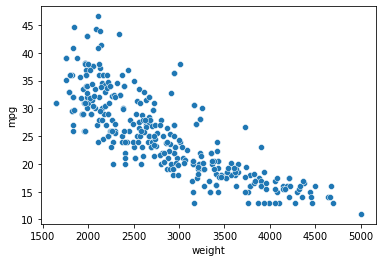

In [4]:
sns.scatterplot(mpg['weight'],mpg['mpg'])

We talked about how we can use linear regression to see how weight relates to mpg linearly

In [5]:
model = LinearRegression()
model.fit(mpg[['weight']],mpg['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's just create a ymodel variable to make our lives a bit easier

In [6]:
ymodel = model.predict(mpg[['weight']])

And we can plot our fitted line on top of our data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


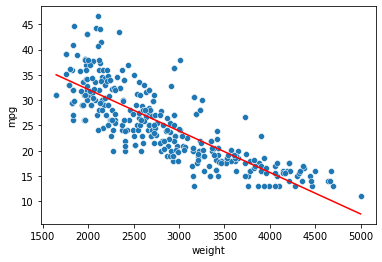

In [7]:
sns.scatterplot(mpg['weight'],mpg['mpg'])
sns.lineplot(mpg['weight'],ymodel,color='r')

Looks good! Though, remember, its important to look at the residuals too

Here, let's do a residual plot, which is the predicted y values plotted against the residuals

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


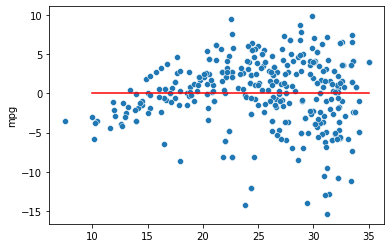

In [8]:
sns.scatterplot(ymodel,ymodel-mpg['mpg'])
sns.lineplot([10,35],[0,0],color='r')

Notice kind of a pattern? It looks an frowny face or an upside u. That is, at lower and higher predicted y values, our predictions underestimate our data. In the middle, our predictions overestimate our data.

This, and the reverse, is a classic sign of the relationship being non-linear

Let's talk about doing non-linear regression instead of linear regression to see if we can do a better fit of the data

 To do so, we will use polynomial regression. Still fitting a line, but now that line will be non-linear at higher order polynomials (i.e., polynomials greater than 1)

Basically, just creating some fake non-linear data

Note that here, I am creating a testing and training set, this will be important later!

In [9]:
# Garrett creating some random data
X = np.random.RandomState(1).rand(30,1)**2
y = (10 - 1./ (X.ravel()+0.1)) + np.random.rand(30) 

X_test = np.linspace(0,1.1,30) 
X_test = X_test[:,np.newaxis]

y_test = (10 - 1./ (X_test.ravel()+0.1)) + np.random.rand(30) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


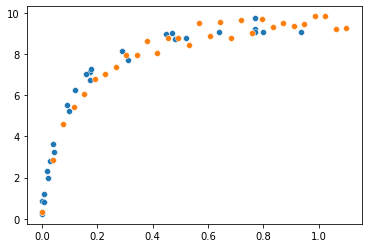

In [10]:
sns.scatterplot(X[:,0],y)
sns.scatterplot(X_test[:,0],y_test)

Load in the library that lets us do polynomial regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

Here, we will do the following things
1. load in the number of features
2. transform the feature array
3. create the linear model
4. fit the transformed feature array 

In [14]:
p = PolynomialFeatures(1) # create the polynomial object we are interested in
X_p = p.fit_transform(X) # get the transformed features
model = LinearRegression() # create our linear model
model.fit(X_p, y) # fit the y values to our transformed features

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

now, let's see how the plot looks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


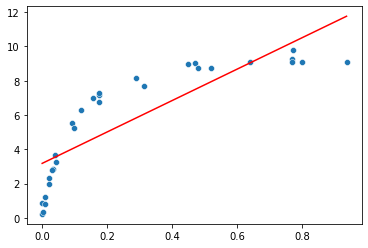

In [15]:
sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],model.predict(X_p),color='r')

You can check out the residuals below. Note that with non-linear data, the datapoints aren't randomly distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


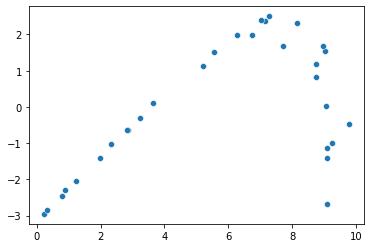

In [16]:
sns.scatterplot(y,y - model.predict(X_p))

now lets check to see how well it fits our data. Let's just focus on the training score for now

In [17]:
model.score(X_p,y)

0.7028062643113249

Now, try all of this above but with a larger polynomial value

Fits much better as the polynomial value increases, right!

But let's be mindful of our testing set data. Remember that our testing set is how we evaluate the model

In [18]:
model.score(p.fit_transform(X_test),y_test)

0.30463210432991994

What you may notice is this -> the training score keeps increasing. The testing score increases, but it suddenly starts to decline. Let's create a for loop to check this out 

(-2.0, 12.0)

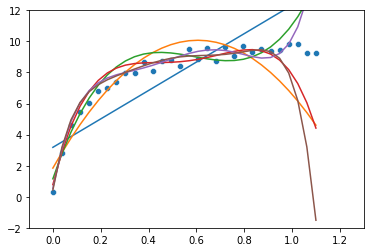

In [19]:
sns.scatterplot(x = X_test[:,0],y = y_test)

training_score = []
testing_score = []
polys = [1,2,3,4,5,6]
for degree in polys:
  
  p = PolynomialFeatures(degree)
  X_p = p.fit_transform(X) 
  model = LinearRegression() 
  model.fit(X_p, y) 

  sns.lineplot(x = X_test[:,0],y = model.predict(p.fit_transform(X_test)))

  training_score.append(model.score(X_p,y))
  testing_score.append(model.score(p.fit_transform(X_test),y_test))

plt.xlim(-.1,1.3)
plt.ylim(-2,12)

Next, let's plot the R^2 values for each polynomial

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-1.0, 1.0)

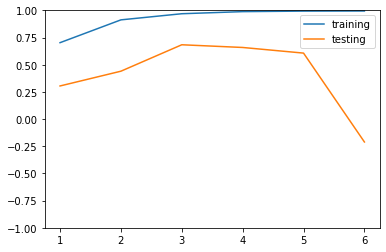

In [20]:
sns.lineplot(polys,training_score,label='training')
sns.lineplot(polys,testing_score,label='testing')
plt.legend()
plt.ylim([-1,1])

We can then plot the results, can see our that score changes as the model becomes more complex.

This comparison we are plotting is actually called the bias-variance tradeoff 

This is why it is really helpful to output both the training and testing set R^2 values.

In the end, its the testing set R^2 that is more important because the testing set is how we are evaluating the linear model. However, let's imagine we find low R^2 for the testing set, but high R^2 for the training set. This may be indicative of something called overfitting, which is a consequence of the bias-variance tradeoff

![alt text](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/figures/05.03-validation-curve.png)


Here validation score is basically our testing score

score = R^2 value

1. The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
2. For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
3. For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
4. For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

So basically, polynomial regression let's us get even better fits to our data, but you have to be careful you are not overfitting your training test and causing a bad fit to your testing data

So, this is why it is important to print out both values

The take away message is this. If your model isn't performing well, you should do the following:

1. Use a more complicated/more flexible model
2. Use a less complicated/less flexible model
3. Gather more training samples
4. Gather more data to add features to each sample

We can try this out with our real data. This code is copied and pasted from above, but modified so it would run (see if you get it to work on your own data!)

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(mpg[['weight']],mpg['mpg'],random_state=1)

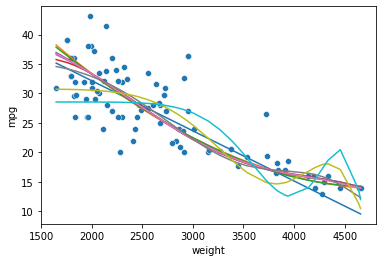

In [37]:
sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest)

training_score = []
testing_score = []
polys = [1,2,3,4,5,6,7,10,15,20]
for degree in polys:
  
  p = PolynomialFeatures(degree)
  X_p = p.fit_transform(Xtrain) 
  model = LinearRegression() 
  model.fit(X_p, ytrain) 

  sns.lineplot(x = Xtest[Xtest.columns[0]],y = model.predict(p.fit_transform(Xtest)))

  training_score.append(model.score(X_p,ytrain))
  testing_score.append(model.score(p.fit_transform(Xtest),ytest))

#plt.xlim(-.1,1.3)
#plt.ylim(-2,12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 1.0)

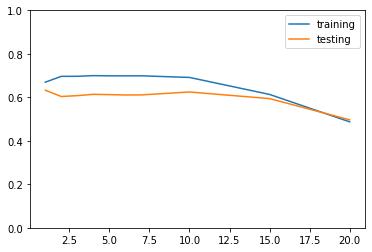

In [38]:
sns.lineplot(polys,training_score,label='training')
sns.lineplot(polys,testing_score,label='testing')
plt.legend()
plt.ylim([0,1])

Note that the final line doesn't perfectly match the figure from above, but that is to be expected when you have limited data and if that data is noisy

# Slightly different topic:

# Below is a discussion of linear regression inference (sort of like what Brendon is covering). It may be helpful for you to know about, but it won't be assessed in this course. So, feel free to check out the stuff below of your own volition!

We have primarily discussed using linear regression to predict or forecast data.

Another way to use linear regression is to measure the significance of the relationship between some dependent variable and predictor variables. That is, we get some p-value that tells us something about how sigificant the relationship is. 

If the null hypothesis is that there is no relationship, then a p-values less than 0.05 indicates the false positive rate (i.e., we falsely reject the null hypothesis) 

We can spend a lot of time discussing the nauce of linear regression analysis. But let's just take a peek here to see how it is done.


In order to do linear regression analysis, we will actually have to use a different library than what we have been using

In [ ]:
import statsmodels.api as sm

Here, you will see that the format is a little different

For OLS, we pass the data directly into the model. We also pass in the target (response) array first! Then, we pass in the feature matrix (predictor variables)

After we do that, we run model.fit and then print the results.summary

In [ ]:
model = sm.OLS(mpg['mpg'], mpg[['acceleration','weight']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              2522.
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                   1.81e-203
Time:                        19:48:16   Log-Likelihood:                         -1122.6
No. Observations:                 339   AIC:                                      2249.
Df Residuals:                     337   BIC:                                      2257.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

This is great. A ton of useful stuff is coming out. We have the different predictors (acceleration, weight), their coeffient values, whether they are significant predictors (P>|t|), the significance of the model (Prob F-statistic), etc

Though. Something is missing. What is missing from this?

Correct! The intercept. Without the intercept, the way statsmodel calculates R^2 is also different and not the method we typically use (so don't pay attention to it!!!)

You can actually add an intercept column to the feature matrix, but I'd actually encourage you to do linear regression analysis a different way

I'd import statsmodels.formula, which is similar to how you would run these models using R or Matlab

In [ ]:
from statsmodels.formula.api import ols

And here, we will specify the equation and at include the fit method at the end

In [ ]:
sm_model = ols("mpg ~ acceleration+weight", data=mpg).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     356.2
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           9.48e-84
Time:                        19:48:41   Log-Likelihood:                -964.31
No. Observations:                 339   AIC:                             1935.
Df Residuals:                     336   BIC:                             1946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.1740      2.027     22.775   

And now, we have that intercept. Cool!

Note that the coef_ and R^2 should be pretty similar to the output from our function from last class

Training R^2 0.6784252380105786
Training R^2 0.6830962769334512
y =    0.15*acceleration +  -0.008*weight +    46.329


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

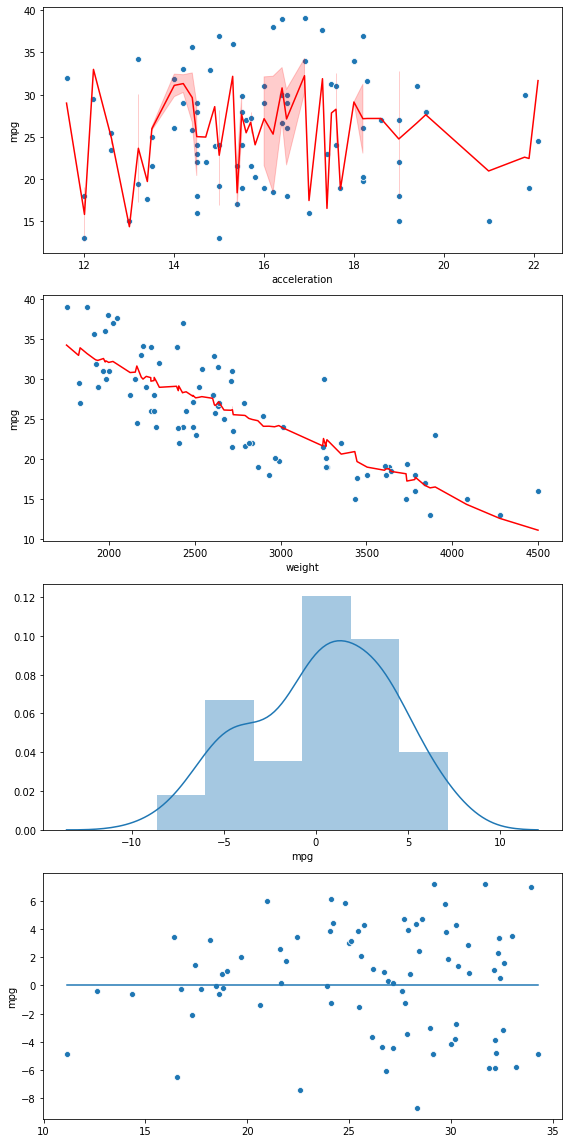

In [ ]:
model_data3(mpg[['acceleration','weight']],mpg['mpg'])

Now, there's a lot more we can talk about here. For example, if you want to include the interaction between horsepower and weight into the model, you can do so by including horsepower*weight

In [ ]:
sm_model_interaction = ols("mpg ~ horsepower + weight + horsepower*weight", data=mpg).fit()
print(sm_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           1.82e-89
Time:                        19:49:06   Log-Likelihood:                -947.87
No. Observations:                 339   AIC:                             1904.
Df Residuals:                     335   BIC:                             1919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.6859      3.15

If you want more details about the formulas, please see this documentation:

https://patsy.readthedocs.io/en/latest/formulas.html

Now, just quickly, we spent a bit of time discussing how to make various plots. Statsmodel can actually do that for us

Let's import the graphics package

In [ ]:
import statsmodels.graphics.api as smg

You can plot the model fits like so

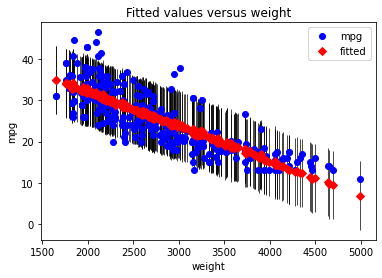

In [ ]:
fig = smg.plot_fit(sm_model,"weight")

This looks a bit messy because we have both error bars and consider we have two features here (weight and acceleration)

I think the partial regression plots may be more informative. The partial regression plot shows the relationship between the response and the given explanatory variable after removing the effect of all other explanatory variables in exog.

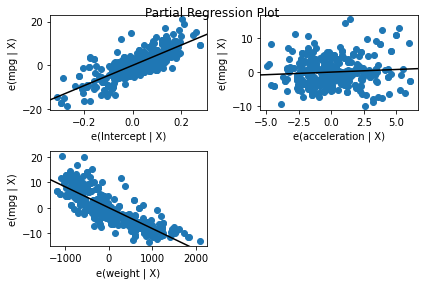

In [ ]:
fig = smg.plot_partregress_grid(sm_model)

A good diagnostic test is to actually use plot_regress_exog, which gives you the following plots in a 2x2 grid:

Dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot

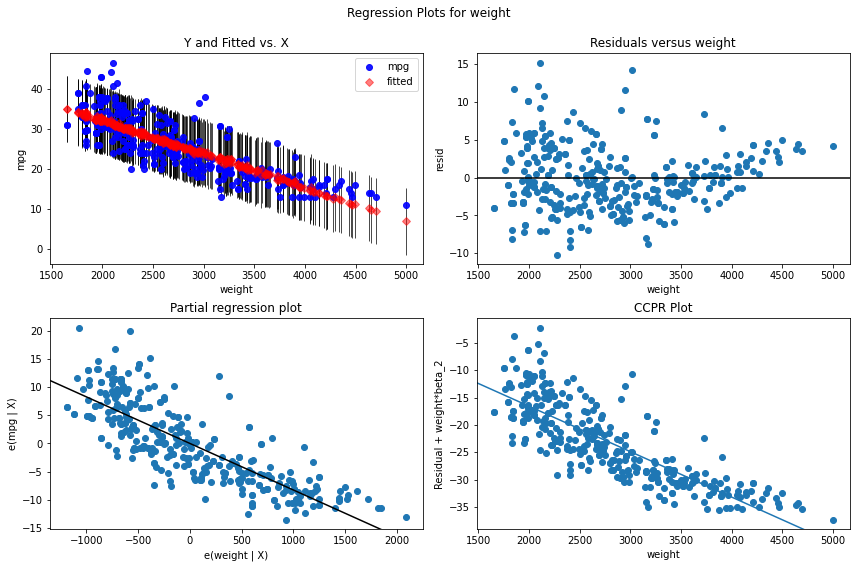

In [ ]:
fig = plt.figure(figsize=[12,8])
fig = sm.graphics.plot_regress_exog(sm_model, "weight",fig=fig)

Cool. Very cool.

I think this is all we will discuss regarding linear regression. Starting next class, we will move onto binary classification, which is some pretty rad stuff!